# 计算ppmi

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch02/ppmi.py

In [11]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(word_to_id)
print(id_to_word)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 小数点后显示3位有效数字
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


# 查找类似的单词

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch02/most_similar.py

In [8]:
# coding: utf-8
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


# 计算单词的余弦相似度

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch02/similarity.py

In [10]:
# coding: utf-8
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  #「you」的单词向量
c1 = C[word_to_id['i']]  #「i」的单词向量
print(cos_similarity(c0, c1))

0.7071067691154799


# 绘制单词的特征值

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch02/count_method_small.py

[[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
   2.226e-16]
 [ 0.000e+00 -5.976e-01  1.802e-01  0.000e+00 -7.812e-01  0.000e+00
   0.000e+00]
 [-4.363e-01 -4.241e-17 -2.172e-16 -5.088e-01 -1.767e-17 -2.253e-01
  -7.071e-01]
 [-2.614e-16 -4.978e-01  6.804e-01 -6.574e-17  5.378e-01  9.951e-17
   1.201e-17]
 [-4.363e-01 -3.229e-17 -1.654e-16 -5.088e-01 -1.345e-17 -2.253e-01
   7.071e-01]
 [-7.092e-01 -3.229e-17 -1.654e-16  6.839e-01 -1.345e-17 -1.710e-01
   5.889e-17]
 [ 3.056e-16 -6.285e-01 -7.103e-01  8.846e-17  3.169e-01 -2.847e-16
  -1.546e-17]]
[3.168e+00 3.168e+00 2.703e+00 2.703e+00 1.514e+00 1.514e+00 1.484e-16]
[[ 0.000e+00 -5.976e-01 -2.296e-16 -4.978e-01 -1.186e-16  2.145e-16
  -6.285e-01]
 [-3.409e-01 -1.110e-16 -4.363e-01  0.000e+00 -4.363e-01 -7.092e-01
   0.000e+00]
 [ 1.205e-01 -5.551e-16  5.088e-01  0.000e+00  5.088e-01 -6.839e-01
   0.000e+00]
 [-0.000e+00 -1.802e-01 -1.586e-16 -6.804e-01  6.344e-17  9.119e-17
   7.103e-01]
 [-9.323e-01 -5.551e-17  

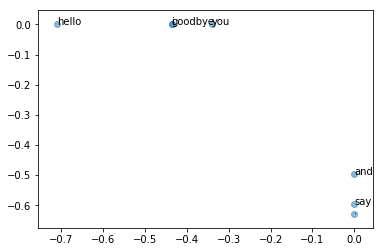

In [12]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(U)
print(S)
print(V)

np.set_printoptions(precision=3)  # 小数点后显示3位有效数字
print(C[0])
print(W[0])
print(U[0])

# plot
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

# 下载并展示ptd数据集的一些信息

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch02/show_ptb.py

In [9]:
# coding: utf-8
import sys
sys.path.append('..')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


# PTB数据集的SVD计算

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch02/count_method_big.py

In [4]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting  co-occurrence ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (fast!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (slow)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

Done
counting  co-occurrence ...
calculating PPMI ...


C:\Users\teimeichi\deep-learning-from-scratch-2-nlp-notebook\common\util.py:139: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\teimeichi\deep-learning-from-scratch-2-nlp-notebook\common\util.py:139: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% done
89.0% done
90.0% done
91.0% done
92.0% do